# CS450.4 Final Project - Akshay Dhavle - Classifying Partisan Bias in News Articles
### Examining data
This notebook contains the steps for examining the dataset being used for this project.

In [2]:
import os
import time
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# base data location
data_dir = r"C:\Users\adhav\Desktop\final-paper\1489920"

# training data and targets
training_subdir = "articles-validation-bypublisher-20181122"
training_data_file = os.path.join(data_dir, training_subdir, "cleaned_articles-validation-bypublisher-20181122.xml")
target_subdir = "ground-truth-validation-bypublisher-20181122"
target_data_file = os.path.join(data_dir, target_subdir, "ground-truth-validation-bypublisher-20181122.xml")

In [4]:
datadf = pd.read_xml(path_or_buffer = training_data_file)
targetdf = pd.read_xml(path_or_buffer = target_data_file)
df = pd.concat([datadf, targetdf], axis = 1)
df.columns = ['id', 'published-at', 'title', 'article', 'id2', 'hyperpartisan', 'bias',
       'url', 'labeled-by']

In [5]:
# run some test cases to ensure the data is good
if len(df) == 150_000:
    print(f"PASS: dataframe has {len(df)} records as expected")
else:
    print(f"FAIL: dataframe has {len(df)} records - expected 150,000")

def validate_column_does_not_have_null_values(column_name):
    if df[column_name].isnull().sum() == 0:
        print(f"PASS: no null values detected for column '{column_name}'")
    else:
        print(f"FAIL: {df[column_name].isnull().sum()} null values for column '{column_name}' not expected")

validate_column_does_not_have_null_values("id")
validate_column_does_not_have_null_values("id2")
validate_column_does_not_have_null_values("article")
validate_column_does_not_have_null_values("bias")

id_matches = df['id'] == df['id2']
n_not_matched = id_matches.value_counts().get(False, 0)
n_matched = id_matches.value_counts().get(True, 0)
if n_matched == 150_000 and n_not_matched == 0:
    print(f"PASS: all article IDs from training file and target file matched (id == id2 for all records)")
else:
    print(f"FAIL: {n_matched} article IDs from training file matched, BUT {n_not_matched} article IDs did not match")

PASS: dataframe has 150000 records as expected
PASS: no null values detected for column 'id'
PASS: no null values detected for column 'id2'
PASS: no null values detected for column 'article'
PASS: no null values detected for column 'bias'
PASS: all article IDs from training file and target file matched (id == id2 for all records)


In [6]:
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             150000 non-null  int64 
 1   published-at   100492 non-null  object
 2   title          137723 non-null  object
 3   article        150000 non-null  object
 4   id2            150000 non-null  int64 
 5   hyperpartisan  150000 non-null  bool  
 6   bias           150000 non-null  object
 7   url            150000 non-null  object
 8   labeled-by     150000 non-null  object
dtypes: bool(1), int64(2), object(6)
memory usage: 9.3+ MB


,id,published-at,title,article,id2,hyperpartisan,bias,url,labeled-by
149995,1494825,None,NaN,<p>By Andrew Osborn</p> \n<p>MOSCOW (Reuters) ...,1494825,True,left,http://politicususa.com/2017/10/04/russia-thro...,publisher
149996,1494857,None,I Now Pronounce You Spouse and Spouse,<p></p> \n<p>In keeping with its reputation of...,1494857,True,right,http://barbwire.com/2014/07/14/now-pronounce-s...,publisher
149997,1494877,2016-03-15,It's now clear that only a Democrat can stop D...,"<p><a href="""" type=""internal"">Donald Trump's</...",1494877,True,left,https://vox.com/2016/3/1/11144320/super-tuesda...,publisher
149998,1494883,2016-02-28,The Liberal Redneck: 'My proudest moment as a ...,"<p></p> \n<p>LR the Liberal Redneck here, comi...",1494883,True,left,http://americannewsx.com/politics/liberal-redn...,publisher
149999,1494893,None,Obama’s Victory: Fourth Global Press Roundup,"<p></p> \n<p></p> \n<p>From <a href=""http://ww...",1494893,False,least,http://themoderatevoice.com/obamas-victory-fou...,publisher


In [8]:
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english', # see https://aclanthology.org/W18-2502/
    max_features=5000,
    min_df=5,
    max_df=0.7)


seconds_start_time = time.time() # replace with timer.start, and timer.end methods. 

bag_of_words = vectorizer.fit_transform(df['article'])

print(f"vectorizer.fit_transform took {time.time() - seconds_start_time} seconds")

bag_of_words_df = pd.DataFrame(
    bag_of_words.toarray(), 
    columns=vectorizer.get_feature_names_out())

bag_of_words_df.head()

vectorizer.fit_transform took 84.28759837150574 seconds


,00,000,01,02,03,04,05,06,07,08,...,younger,youth,youtube,yuan,zero,zimbabwe,zionist,zone,zones,zuma
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.105243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.049117,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050786,0.000000,0.0,0.0,0.0,0.0,0.04286,0.042846,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.031106,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(bag_of_words_df, 
                                                    df['bias'], 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=df['bias'])

In [10]:
# https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
# https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions/52388406#52388406
# https://forecastegy.com/posts/how-to-solve-logistic-regression-not-converging-in-scikit-learn/
model = LogisticRegression(max_iter=1000)

seconds_start_time = time.time() # replace with timer.start, and timer.end methods. 
model.fit(x_train, y_train)
print(f"model.fit took {time.time() - seconds_start_time} seconds")

model.score(x_test, y_test)

model.fit took 89.32525944709778 seconds


0.8210333333333333

In [143]:
for i in range(100):
    p = (model.predict(x_test.iloc[[i]]))[0]
    prb = model.predict_proba(x_test.iloc[[i]])
    a = ((y_test.iloc[[i]]).values)[0]
    matched = "matched"
    if p != a:
        matched = "NOT MATCHED"
    # print(f"{i} - {prb} predicted {p} - actual {a} - {matched}")

NameError: name 'model' is not defined

In [16]:
import matplotlib.pyplot as plt
x_train.head()

,00,000,01,02,03,04,05,06,07,08,...,younger,youth,youtube,yuan,zero,zimbabwe,zionist,zone,zones,zuma
44788,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.035492,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15687,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57894,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.056923,...,0.0,0.0,0.066595,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123353,0.0,0.0,0.019602,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.022681,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130296,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


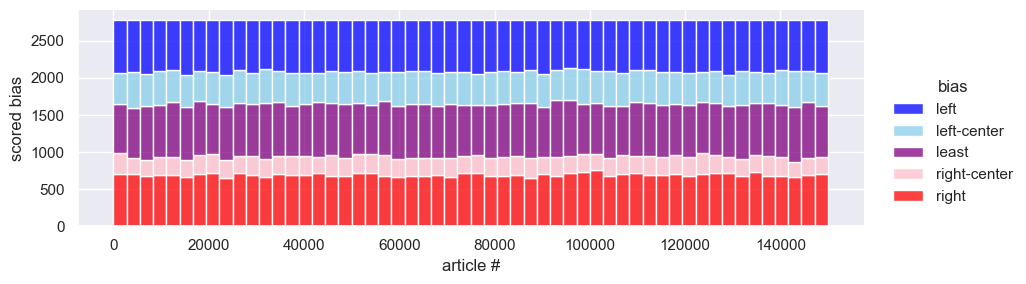

In [142]:
data_distribution_chart = sns.displot(
    data = df,
    x = df.index,
    hue = "bias",
    multiple = "stack",
    height = 3,
    aspect = 3,
    hue_order = ['left', 'left-center', 'least', 'right-center', 'right'],
    palette=['blue', 'skyblue', 'purple', 'pink', 'red'])

data_distribution_chart.set_xlabels("article #")
data_distribution_chart.set_ylabels("scored bias")

plt.show()